In [2]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\welcome\\Downloads\\portland_oregon_monthly_riders data\\portland-oregon-average-monthly-.csv")

In [4]:
df

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [5]:
df.columns=["Month","average ridership"]

In [6]:
df

,Month,average ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [7]:
df.isnull().sum()

Month                0
average ridership    0
dtype: int64

In [8]:
df["average ridership"].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [9]:
df = df.drop(df.index[df['average ridership'] == ' n=114'])

In [10]:
df["average ridership"]=df["average ridership"].astype(np.int32)

In [11]:
df

,Month,average ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394


In [12]:
df["Month"]=pd.to_datetime(df["Month"])

In [13]:
df.dtypes

Month                datetime64[ns]
average ridership             int32
dtype: object

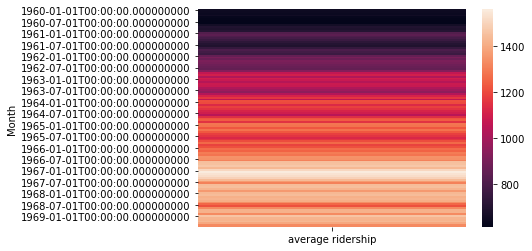

In [14]:
pt=df.pivot_table(index="Month" , values="average ridership")
sns.heatmap(pt)

In [15]:
df.set_index("Month",inplace=True)

In [16]:
df

,average ridership
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630
...,...
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432


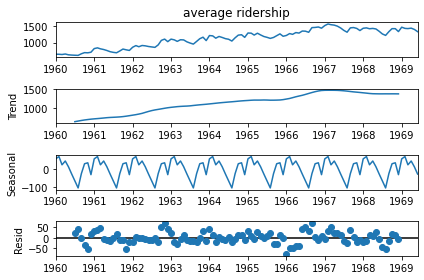

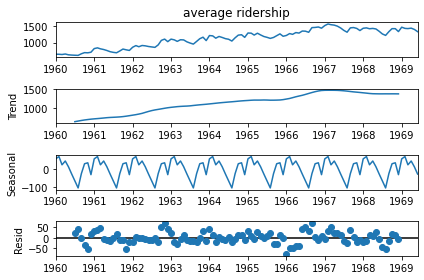

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(df["average ridership"])
sd.plot()

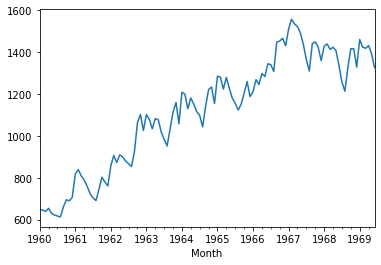

In [18]:
df["average ridership"].plot()

In [19]:
from statsmodels.tsa.stattools import adfuller as ad
add=ad(df["average ridership"])
print("ad statistic",add[0])
print("ad probability",add[1])
print("ad lags",add[2])
print("ad  total values",add[3])

ad statistic -1.536597144453159
ad probability 0.5153358797821738
ad lags 12
ad  total values 101


In [20]:
#differencing
df["firstdiff"]=df["average ridership"]-df["average ridership"].shift(1)
df

,average ridership,firstdiff
Month,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0
...,...,...
1969-02-01,1425,-36.0
1969-03-01,1419,-6.0
1969-04-01,1432,13.0


In [21]:
ad(df["firstdiff"].dropna())

(-1.9386960651548364,
 0.314081837060854,
 11,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 1019.5692927050793)

In [22]:
df["seconddiff"]=df["firstdiff"]-df["firstdiff"].shift(1)

In [23]:
ad(df["seconddiff"].dropna())

(-12.478694023728906,
 3.1263782158281715e-23,
 10,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 1011.3879029818127)

In [24]:
#d=1

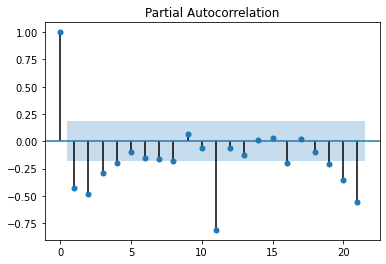

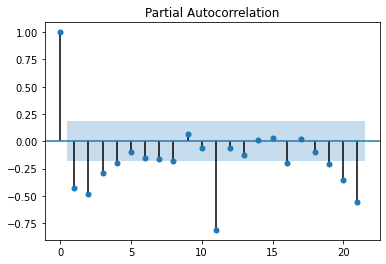

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df["seconddiff"].dropna())


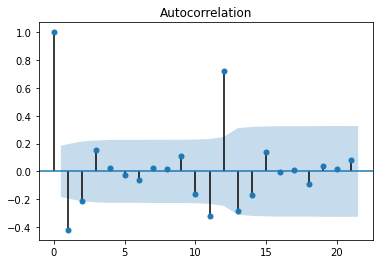

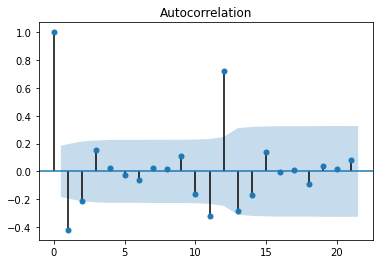

In [26]:
plot_acf(df["seconddiff"].dropna())

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df["average ridership"],order=(0,1,0),seasonal_order=(1,1,1,12))
results=model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [28]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                    average ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Tue, 08 Dec 2020   AIC                           1008.680
Time:                                      20:37:59   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.99

In [29]:
len(df)

114

In [30]:
df.size

342

In [31]:
df["predicted"]=results.predict(start=102,end=120,dynamic=True)

In [32]:
df["predicted"]

Month
1960-01-01            NaN
1960-02-01            NaN
1960-03-01            NaN
1960-04-01            NaN
1960-05-01            NaN
                 ...     
1969-02-01    1438.086080
1969-03-01    1407.271701
1969-04-01    1427.485546
1969-05-01    1406.608616
1969-06-01    1362.724265
Name: predicted, Length: 114, dtype: float64

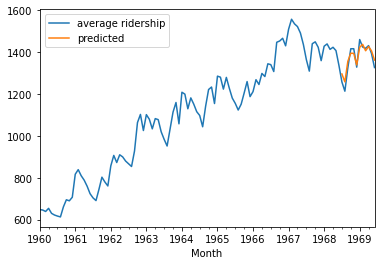

In [33]:
df[["average ridership","predicted"]].plot()

In [34]:
len(df["average ridership"])

114

In [35]:
from pandas.tseries.offsets import DateOffset as do
futuredates=[df.index[-1]+do(months=x) for x in range(0,10)]
dates=pd.DataFrame(index=futuredates,columns=df.columns)

In [36]:
concatdf=pd.concat([df,dates])

In [37]:
concatdf

,average ridership,firstdiff,seconddiff,predicted
1960-01-01,648,NaN,NaN,NaN
1960-02-01,646,-2.0,NaN,NaN
1960-03-01,639,-7.0,-5.0,NaN
1960-04-01,654,15.0,22.0,NaN
1960-05-01,630,-24.0,-39.0,NaN
...,...,...,...,...
1969-11-01,NaN,NaN,NaN,NaN
1969-12-01,NaN,NaN,NaN,NaN
1970-01-01,NaN,NaN,NaN,NaN
1970-02-01,NaN,NaN,NaN,NaN


In [38]:
concatdf["True"]=results.predict(start=114,end=125,dynamic=True)

In [39]:
concatdf["True"]

1960-01-01            NaN
1960-02-01            NaN
1960-03-01            NaN
1960-04-01            NaN
1960-05-01            NaN
                 ...     
1969-11-01    1416.993959
1969-12-01    1350.886056
1970-01-01    1460.474237
1970-02-01    1454.737701
1970-03-01    1432.660665
Name: True, Length: 124, dtype: float64

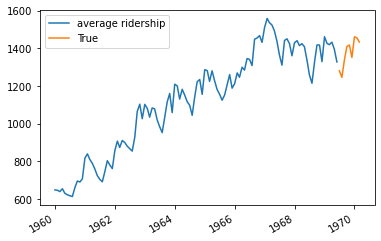

In [42]:
concatdf[["average ridership","True"]].plot()

In [ ]:
concatdf.tail()

In [ ]:
concatdf.info()